# Data analysis of extracted data

Necessary imports. Snippet class must be loaded into program for unpickling

In [26]:
import matplotlib.pyplot as plt
from pickle import dump, load
from snippet_creation import Snippet
from utils.config import OPT_LEVELS, METHODS

Data is then loaded

In [5]:
with open("data/pickled_data.pickle", "rb") as pickled_dataset:
    snippet_list = load(pickled_dataset)

Quick test of correct loading

In [9]:
for elem in snippet_list[:10]:
    print(elem.binary)
    print(elem.method)
    print(elem.opt)
    print ('\n'.join(str(p) for p in elem.instructions))

matrix
std::vector::resize
-O2
0x401468: mov eax, dword ptr [rsp + 0x2c]
0x40146c: mov r15, qword ptr [rsp + 0x30] [INL]
0x401471: test eax, eax
0x401473: jne 0x4014ae
0x401475: mov r14, qword ptr [rsp + 0x38] [INL]
0x40147a: lea esi, [rbx + 2]
0x40147d: lea r13d, [rbx + 1]
0x401481: movabs rcx, 0xaaaaaaaaaaaaaaab [INL]
0x40148b: movsxd rsi, esi
0x40148e: mov rax, r14 [INL]
0x401491: sub rax, r15 [INL]
0x401494: sar rax, 3 [INL]
0x401498: imul rax, rcx [INL]
0x40149c: cmp rsi, rax [INL]
0x40149f: ja 0x4015a0 [INL]
0x4014a5: mov ebx, r13d
0x4014a8: jb 0x4015dc [INL]
0x4015a0: mov rdi, qword ptr [rsp + 0x18] [INL]
0x4015a5: sub rsi, rax [INL]
0x4015a8: call 0x401e60 [INL]
0x4015dc: imul rsi, rsi, 0x18 [INL]
0x4015e0: lea rax, [r15 + rsi] [INL]
0x4015e4: mov qword ptr [rsp], rax [INL]
0x4015e8: cmp r14, rax [INL]
0x4015eb: je 0x4014ae [INL]
0x4015f1: mov rbx, rax [INL]
0x4015f4: nop dword ptr [rax] [INL]
0x4015f8: mov rdi, qword ptr [rbx] [INL]
0x4015fb: test rdi, rdi [INL]
0x4015fe: je 0

## Visualize dataset size and distribution across optimization levels

Count the occurrence of each optimization level

In [10]:
opt_count = {o : 0 for o in OPT_LEVELS}
    
for snippet in snippet_list:
    opt_count[snippet.opt] +=1
opt_perc = {key : opt_count[key]/len(snippet_list) for key in opt_count}

print(opt_count)
print(len(snippet_list))
print(opt_perc)


{'-O2': 11596, '-O3': 12355, '-Os': 5431, '-Ofast': 532}
29914
{'-O2': 0.38764458113258005, '-O3': 0.413017316306746, '-Os': 0.18155378752423615, '-Ofast': 0.01778431503643779}


Create bar plot

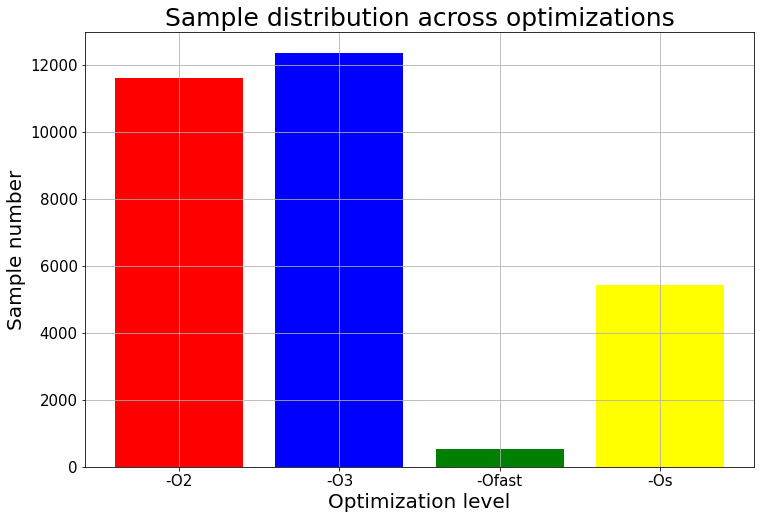

In [20]:
fig, ax = plt.subplots(figsize=(12,8))

x = sorted(opt_count.keys())
y = [opt_count[k] for k in x]
colors = ["red", "blue", "green", "yellow"]
ax.bar(x, y, color=colors)
ax.set_xlabel("Optimization level", fontsize=20)
ax.set_ylabel("Sample number", fontsize=20)
ax.set_title("Sample distribution across optimizations", fontsize=25)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=15)

## Visualize distribution across optimization levels

Count the occurrence of each method, and plot it

In [12]:
methods_count = {m : 0 for m in METHODS}

for snippet in snippet_list:
    methods_count[snippet.method] += 1
    

methods_perc = {key : methods_count[key]/len(snippet_list) for key in methods_count}

print (methods_perc)

{'std::map::lower_bound': 0.08902186267299592, 'std::map::upper_bound': 0.005482382830781574, 'std::vector::clear': 0.07852510530186535, 'std::vector::push_back': 0.4498228254329077, 'std::vector::reserve': 0.006786120211272314, 'std::deque::operator[]': 0.05037774954870629, 'std::vector::resize': 0.04967573711305743, 'std::deque::pop_front': 0.021294377214682088, 'std::deque::push_back': 0.07377816407033495, 'std::map::find': 0.09029217088988434, 'std::map::operator[]': 0.06308083171759042, 'std::vector::erase': 0.021862672995921643}


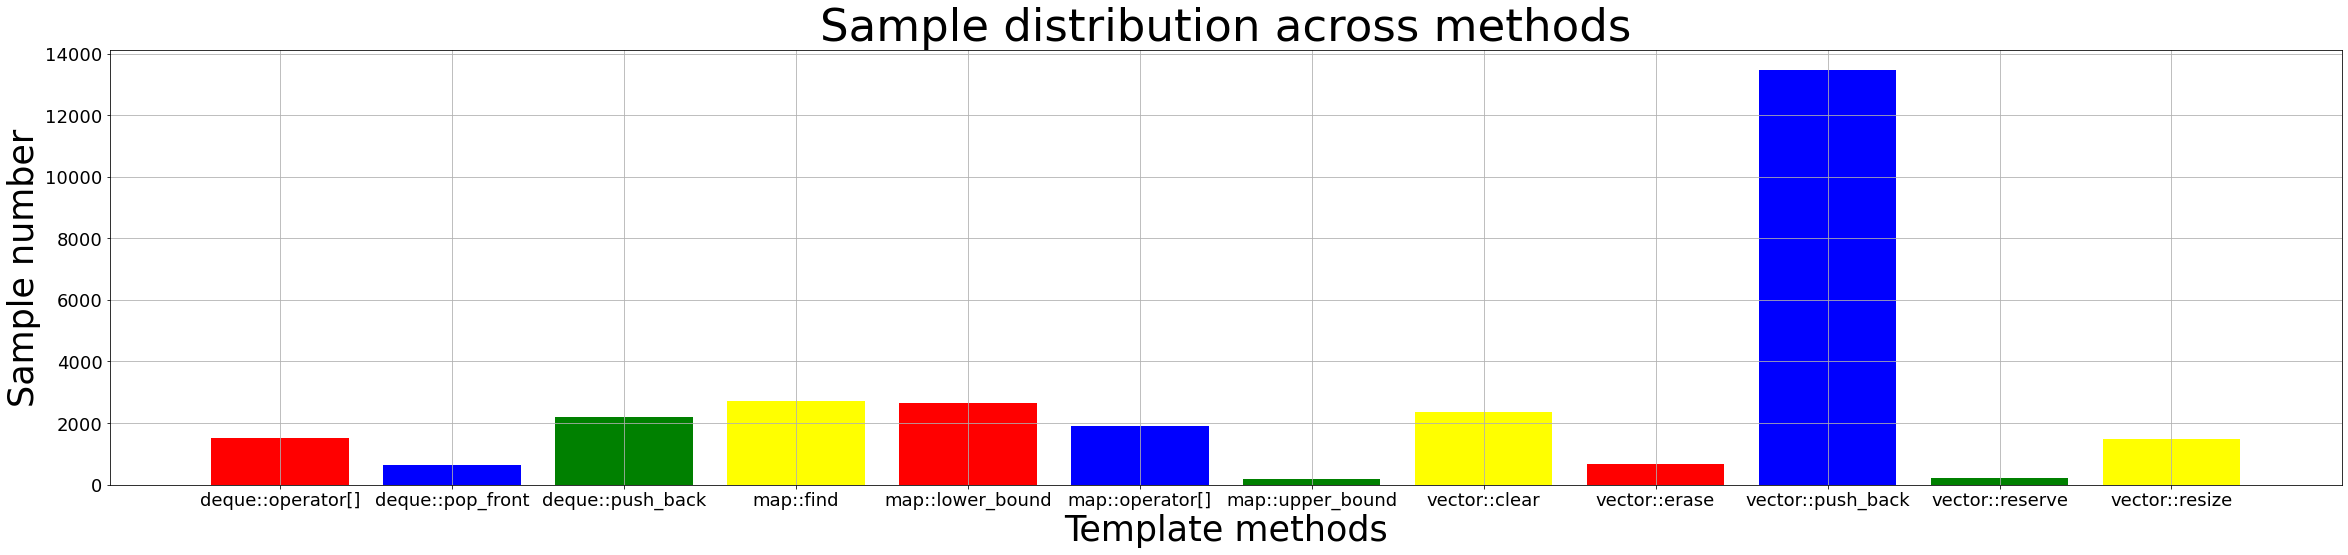

In [19]:
fig, ax = plt.subplots(figsize=(40,8))

x = [k[5:] for k in sorted(methods_count.keys())]
y = [methods_count[k] for k in sorted(methods_count.keys())]
colors = ["red", "blue", "green", "yellow"]
ax.bar(x, y, color=colors)
ax.set_xlabel("Template methods", fontsize=35)
ax.set_ylabel("Sample number", fontsize=35)
ax.set_title("Sample distribution across methods", fontsize=45)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=18)

## Visualize length distribution of snippets across optimization levels and methods

For both length of snippets and number of basic blocks, create a grid of plots

In [ ]:
numopt = len(OPT_LEVELS)
methods = METHODS
nummethods = len(methods)

fig, axs = plt.subplots(nummethods, numopt, figsize=(8*numopt, 8*nummethods), sharey=True)

colors = ["red", "blue", "green", "yellow"]
for j in range(nummethods):
    for i in range(numopt):
        len_list = list((len(snippet.target_seq) for snippet in snippet_list if (snippet.opt == OPT_LEVELS[i] and snippet.method == methods[j])))
      
        if not len_list: 
            print(methods[j])
            continue
        ceil = max(len_list)

        axs[j][i].hist(len_list, ceil, log=True, color=colors[i%4])
        axs[j][i].set_xlabel("Snippet length", fontsize=20)
        axs[j][i].set_ylabel("Length count", fontsize=20)
        axs[j][i].set_title(methods[j]+OPT_LEVELS[i], fontsize=25)
        axs[j][i].grid(True)
        axs[j][i].tick_params(axis='both', which='major', labelsize=15)

std::map::find
std::map::upper_bound
std::vector::erase


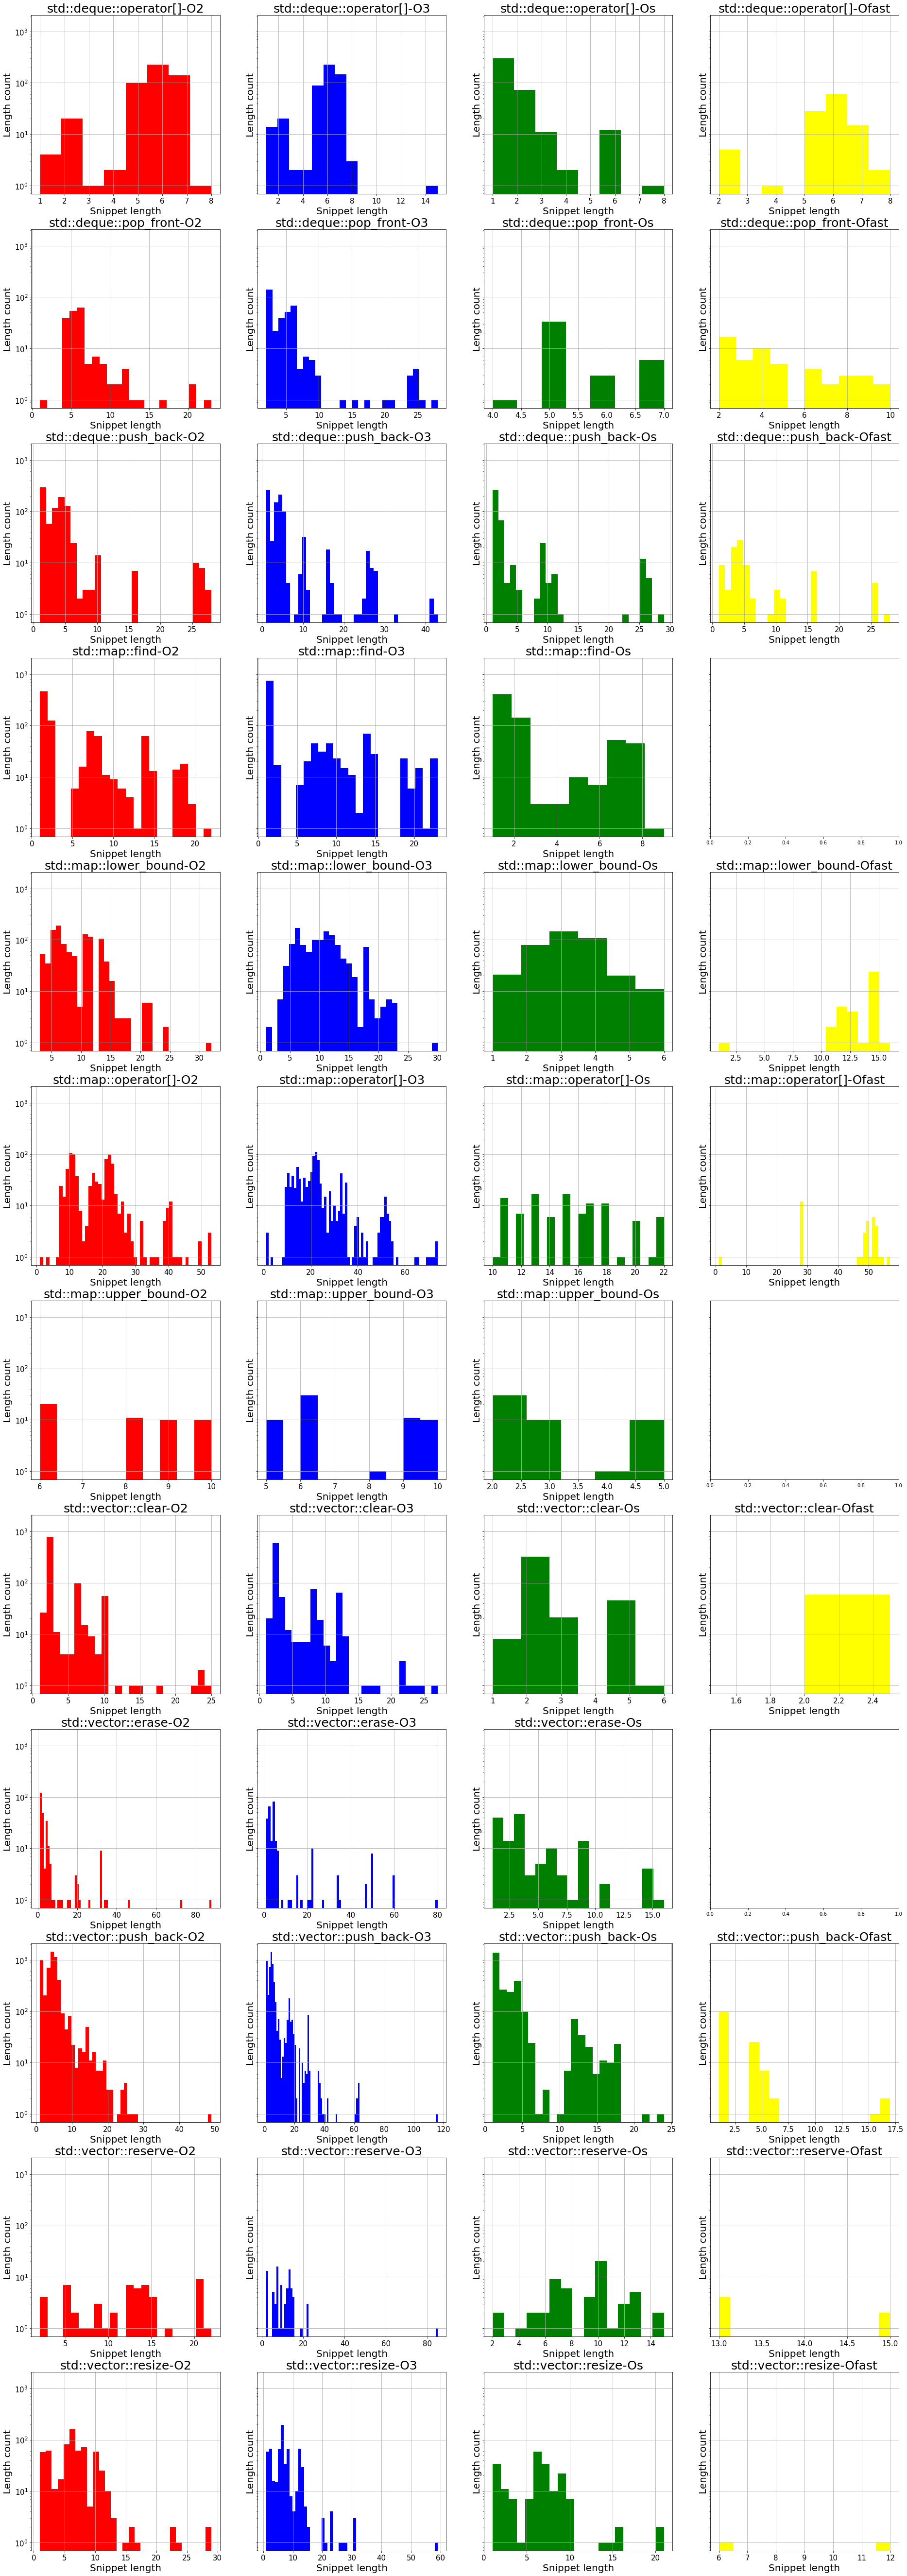

In [25]:
fig, axs = plt.subplots(nummethods, numopt, figsize=(8*numopt, 8*nummethods), sharey=True)

colors = ["red", "blue", "green", "yellow"]
for j in range(nummethods):
    for i in range(numopt):
        len_list = list((snippet.blocksize for snippet in snippet_list if (snippet.opt == OPT_LEVELS[i] and snippet.method == methods[j])))
      
        if not len_list: 
            print(methods[j])
            continue
        ceil = max(len_list)

        axs[j][i].hist(len_list, ceil, log=True, color=colors[i%4])
        axs[j][i].set_xlabel("Snippet length", fontsize=20)
        axs[j][i].set_ylabel("Length count", fontsize=20)
        axs[j][i].set_title(methods[j]+OPT_LEVELS[i], fontsize=25)
        axs[j][i].grid(True)
        axs[j][i].tick_params(axis='both', which='major', labelsize=15)